In [1]:
import pandas as pd

import ipywidgets as widgets
from IPython.display import clear_output, HTML

from wimbledon.vis import Visualise

## Select Dates to Show

In [2]:
# date picker to choose a start date
widg_start = widgets.DatePicker(
                    description='Start Date:',
                    value=pd.datetime.now()-pd.Timedelta('30 days'),
                    disabled=False
                )

# date picker to choose an end date
widg_end = widgets.DatePicker(
                    description='End Date:',
                    value=pd.datetime.now()+pd.Timedelta('365 days'),
                    disabled=False
                )

freq_dict = {'Monthly':'MS','Weekly':'W-MON','Daily':'D'}

# radio buttons to choose the frequency of dates to display in tables/heatmaps
widg_freq = widgets.RadioButtons(
    options=freq_dict.keys(),
    description='Frequency:',
    disabled=False
)

display(widg_start, widg_end, widg_freq)

DatePicker(value=datetime.datetime(2019, 7, 20, 16, 8, 50, 723500), description='Start Date:')

DatePicker(value=datetime.datetime(2020, 8, 18, 16, 8, 50, 727719), description='End Date:')

RadioButtons(description='Frequency:', options=('Monthly', 'Weekly', 'Daily'), value='Monthly')

## Load Data

In [3]:
vis = Visualise(start_date=pd.to_datetime(widg_start.value), 
                end_date=pd.to_datetime(widg_end.value), 
                freq=freq_dict[widg_freq.value],
                with_tracked_time=False)

In [4]:
def update_vis_params(change):
    vis.START_DATE = pd.to_datetime(widg_start.value)
    vis.END_DATE = pd.to_datetime(widg_end.value)
    vis.FREQ = freq_dict[widg_freq.value]

widg_start.observe(update_vis_params, names='value')
widg_end.observe(update_vis_params, names='value')
widg_freq.observe(update_vis_params, names='value')

## Whiteboard Visualisations

In [5]:
display(HTML(vis.whiteboard('person')))

In [6]:
display(HTML(vis.whiteboard('project')))

## Show Someone's Project Assignment

In [7]:
## dropdown list to select a person
widg_person_select = widgets.Dropdown(options=sorted([vis.wim.get_person_name(person_id) for person_id in vis.wim.people.index]),
                                 description='Person:')

def widg_person_select_alloc(change):
    """Function called by widgets to update the person allocation plot and table.
    The change argument isn't used but it's required for widget.observe."""
    
    # clear the previous output, then display the widgets again
    clear_output()
    display(widg_person_select)
    
    # get the person_id from the selected full name (need to first split into first and last names)
    names = widg_person_select.value
    person_id = vis.wim.get_person_id(names)
    
    # plot the person allocations
    vis.plot_allocations(person_id, 'person')
    
    # print the person allocations table
    #display(vis.table_allocations(person_id, 'person'))
    vis.heatmap_allocations(person_id, 'person')
    
# setup the event listeners
widg_person_select.observe(widg_person_select_alloc, names='value')

# display the widgets
display(widg_person_select)

# show results with initial values
widg_person_select_alloc(None)

Dropdown(description='Person:', options=('Amaani Hoddoon', 'Amber Raza', 'Angus Williams', 'Angus Williams', '…

## Show Everyone's Total Project Allocation Over Time

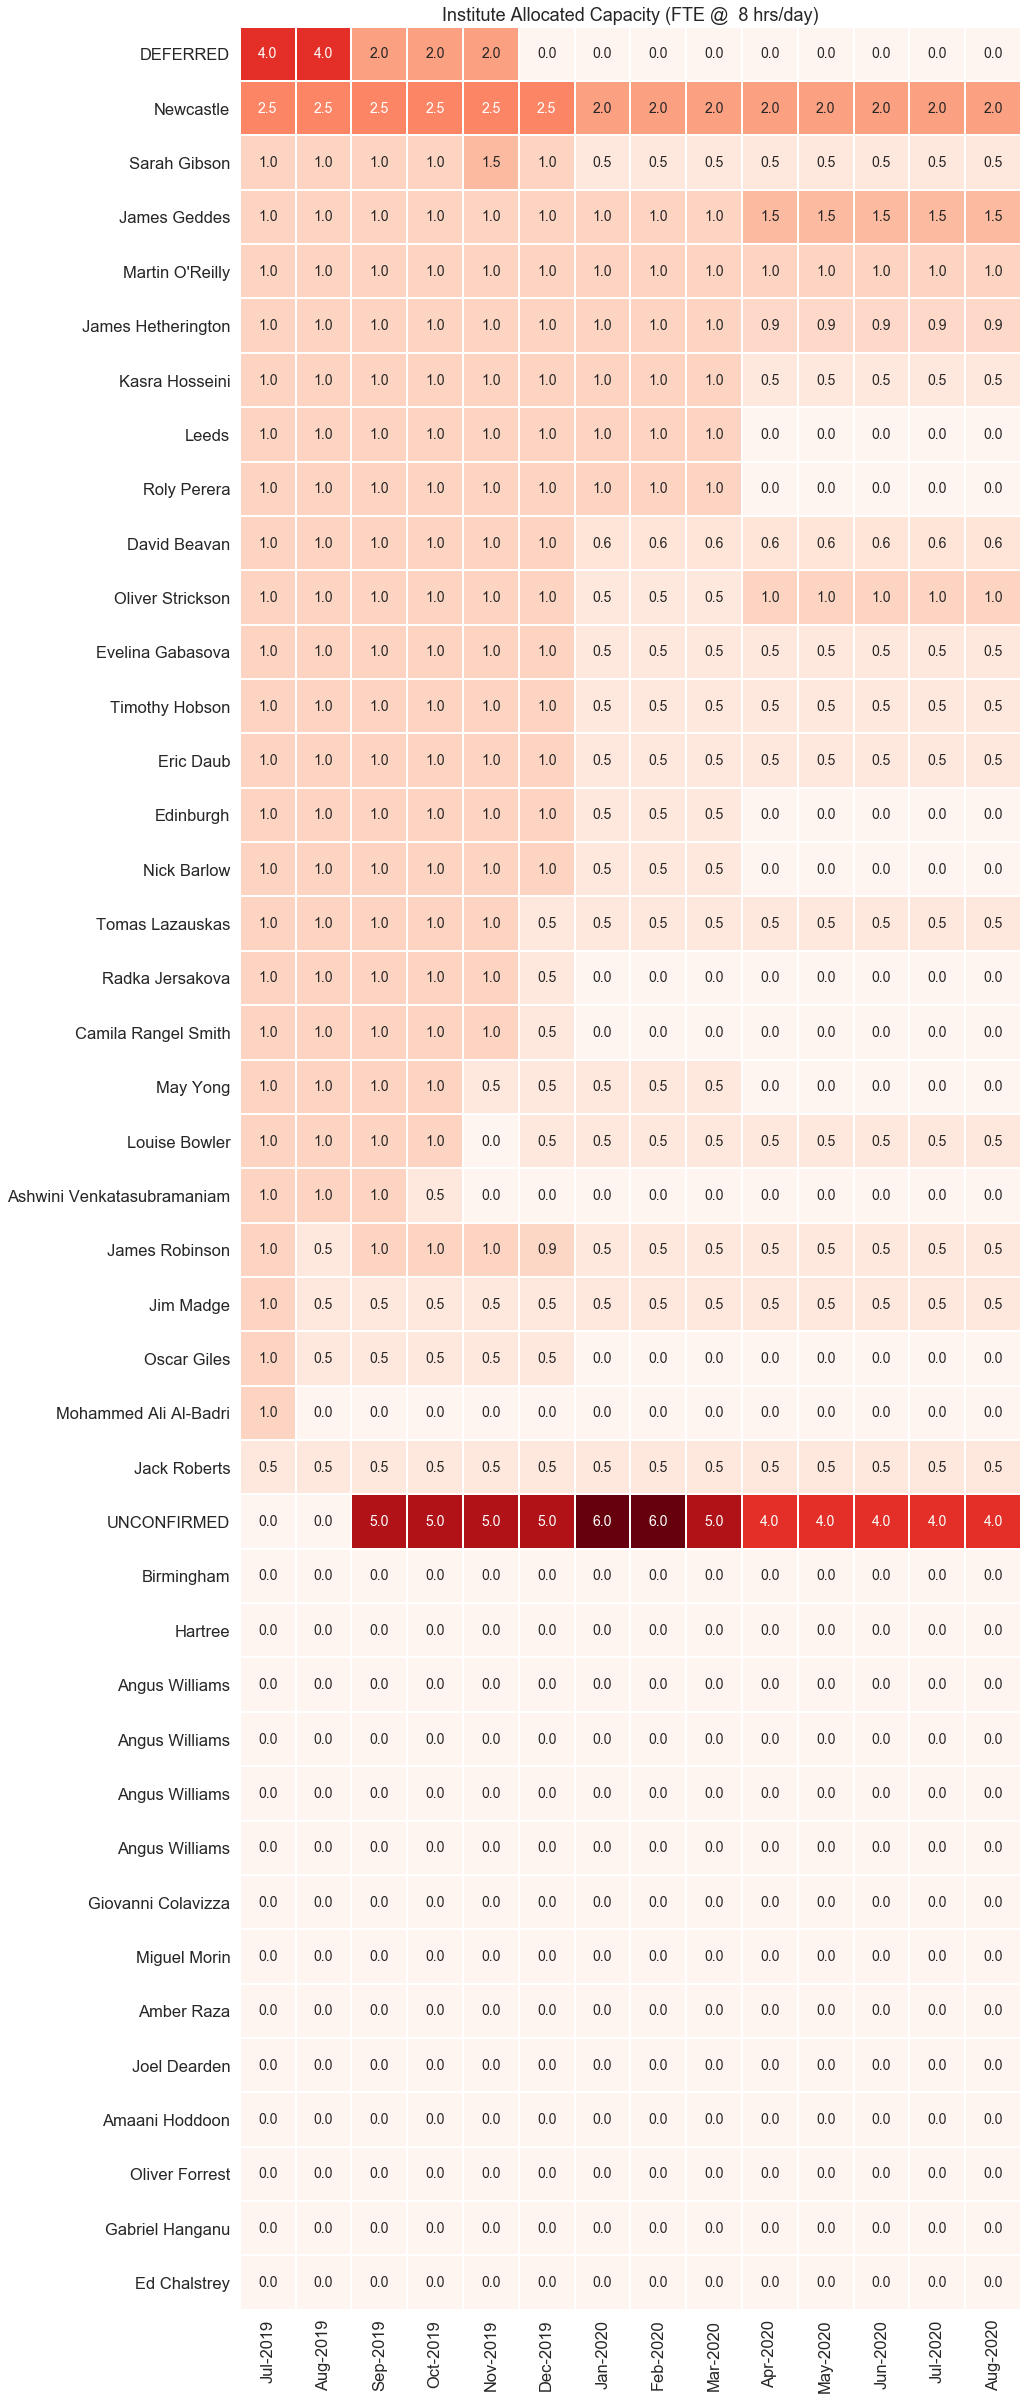

In [8]:
vis.heatmap_allocations('ALL_PEOPLE', 'institute');

## Show Who's Assigned to a Project

Dropdown(description='project:', index=57, options=('44 days', 'AI for City Planning', 'AIDA', 'AIDA Wrangling…

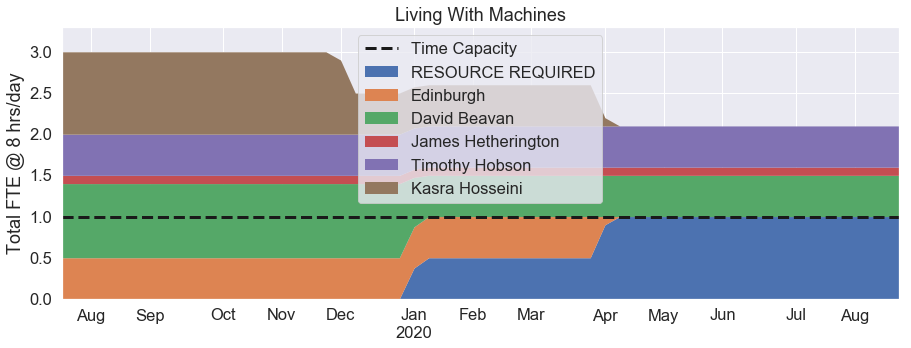

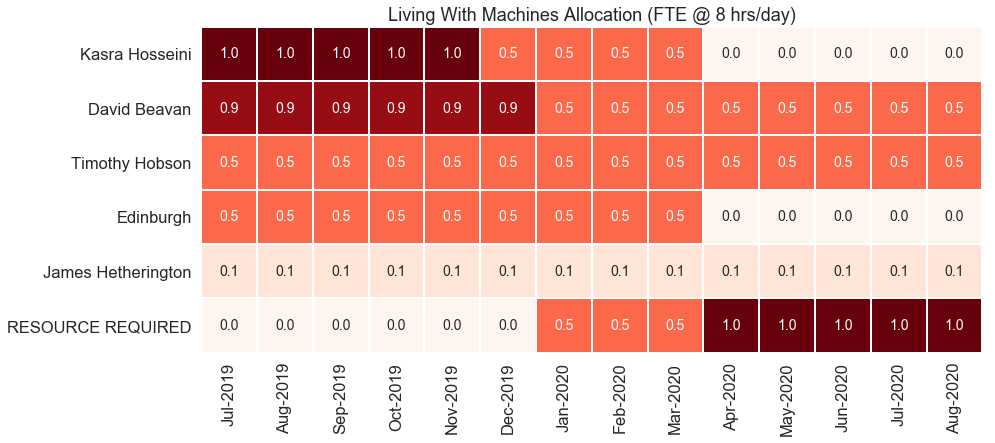

In [9]:
## dropdown list to select a project
widg_project_select = widgets.Dropdown(options=sorted([vis.wim.get_project_name(project_id) for project_id in vis.wim.projects.index]),
                                 description='project:')

def widg_project_select_alloc(change):
    """Function called by widgets to update the project allocation plot and table.
    The change argument isn't used but it's required for widget.observe."""
    
    # clear the previous output, then display the widgets again
    clear_output()
    display(widg_project_select)
    
    # get the project_id from the selected full name (need to first split into first and last names)
    project_id = vis.wim.get_project_id(widg_project_select.value)
    
    # plot the project allocations
    vis.plot_allocations(project_id, 'institute')
    
    # plot a heatmap of the allocations
    vis.heatmap_allocations(project_id, 'institute')

# setup the event listeners
widg_project_select.observe(widg_project_select_alloc, names='value')

# display the widgets
display(widg_project_select)

# show results with initial values
widg_project_select_alloc(None)

## Show the Total Resources Required by All Projects

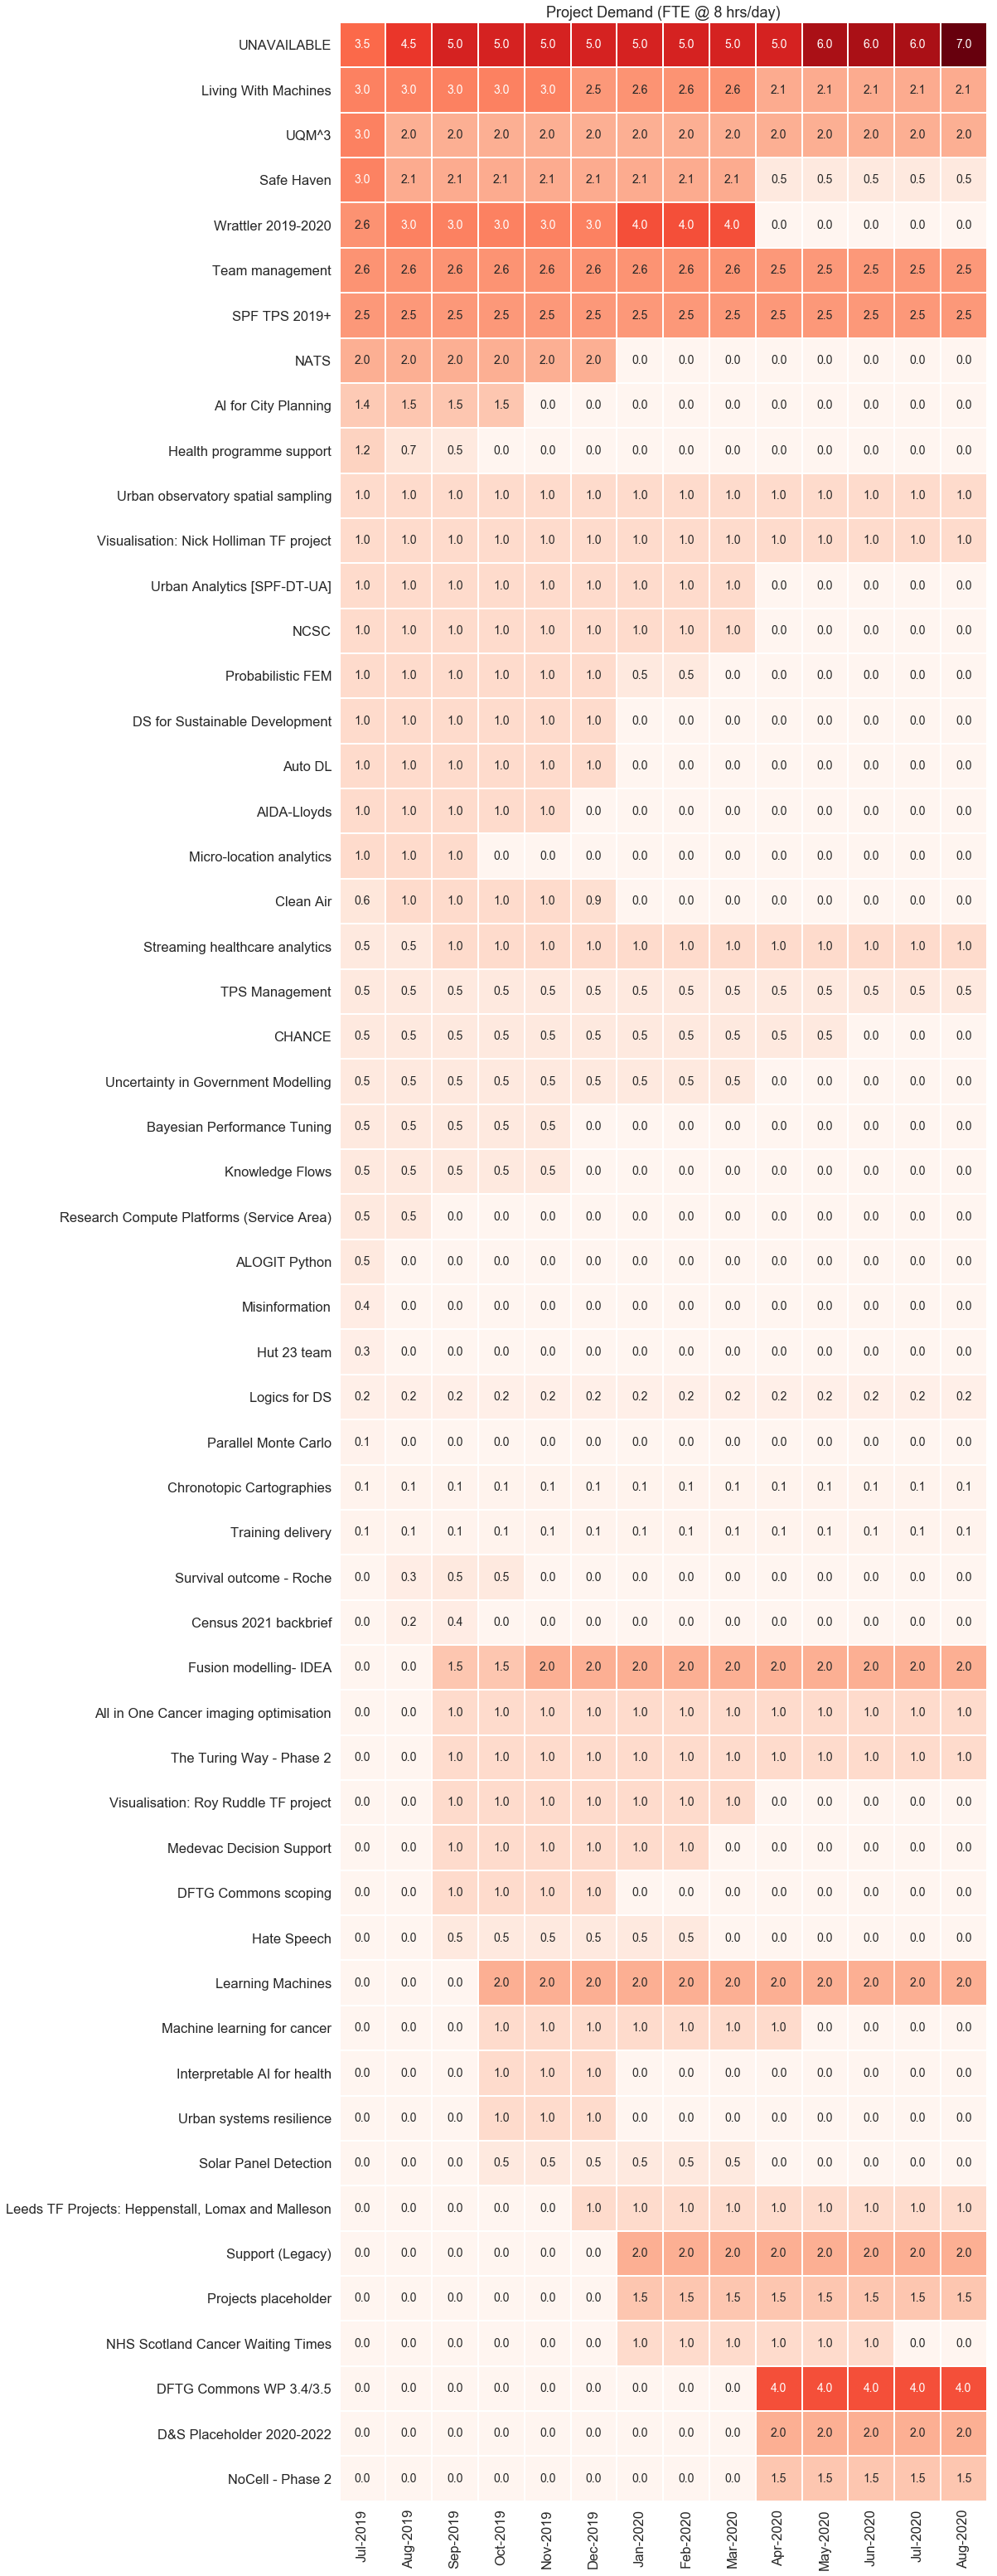

In [10]:
vis.heatmap_allocations('PROJECT_REQUIREMENTS','institute');

## Show the Total Resources Allocated to Each Project

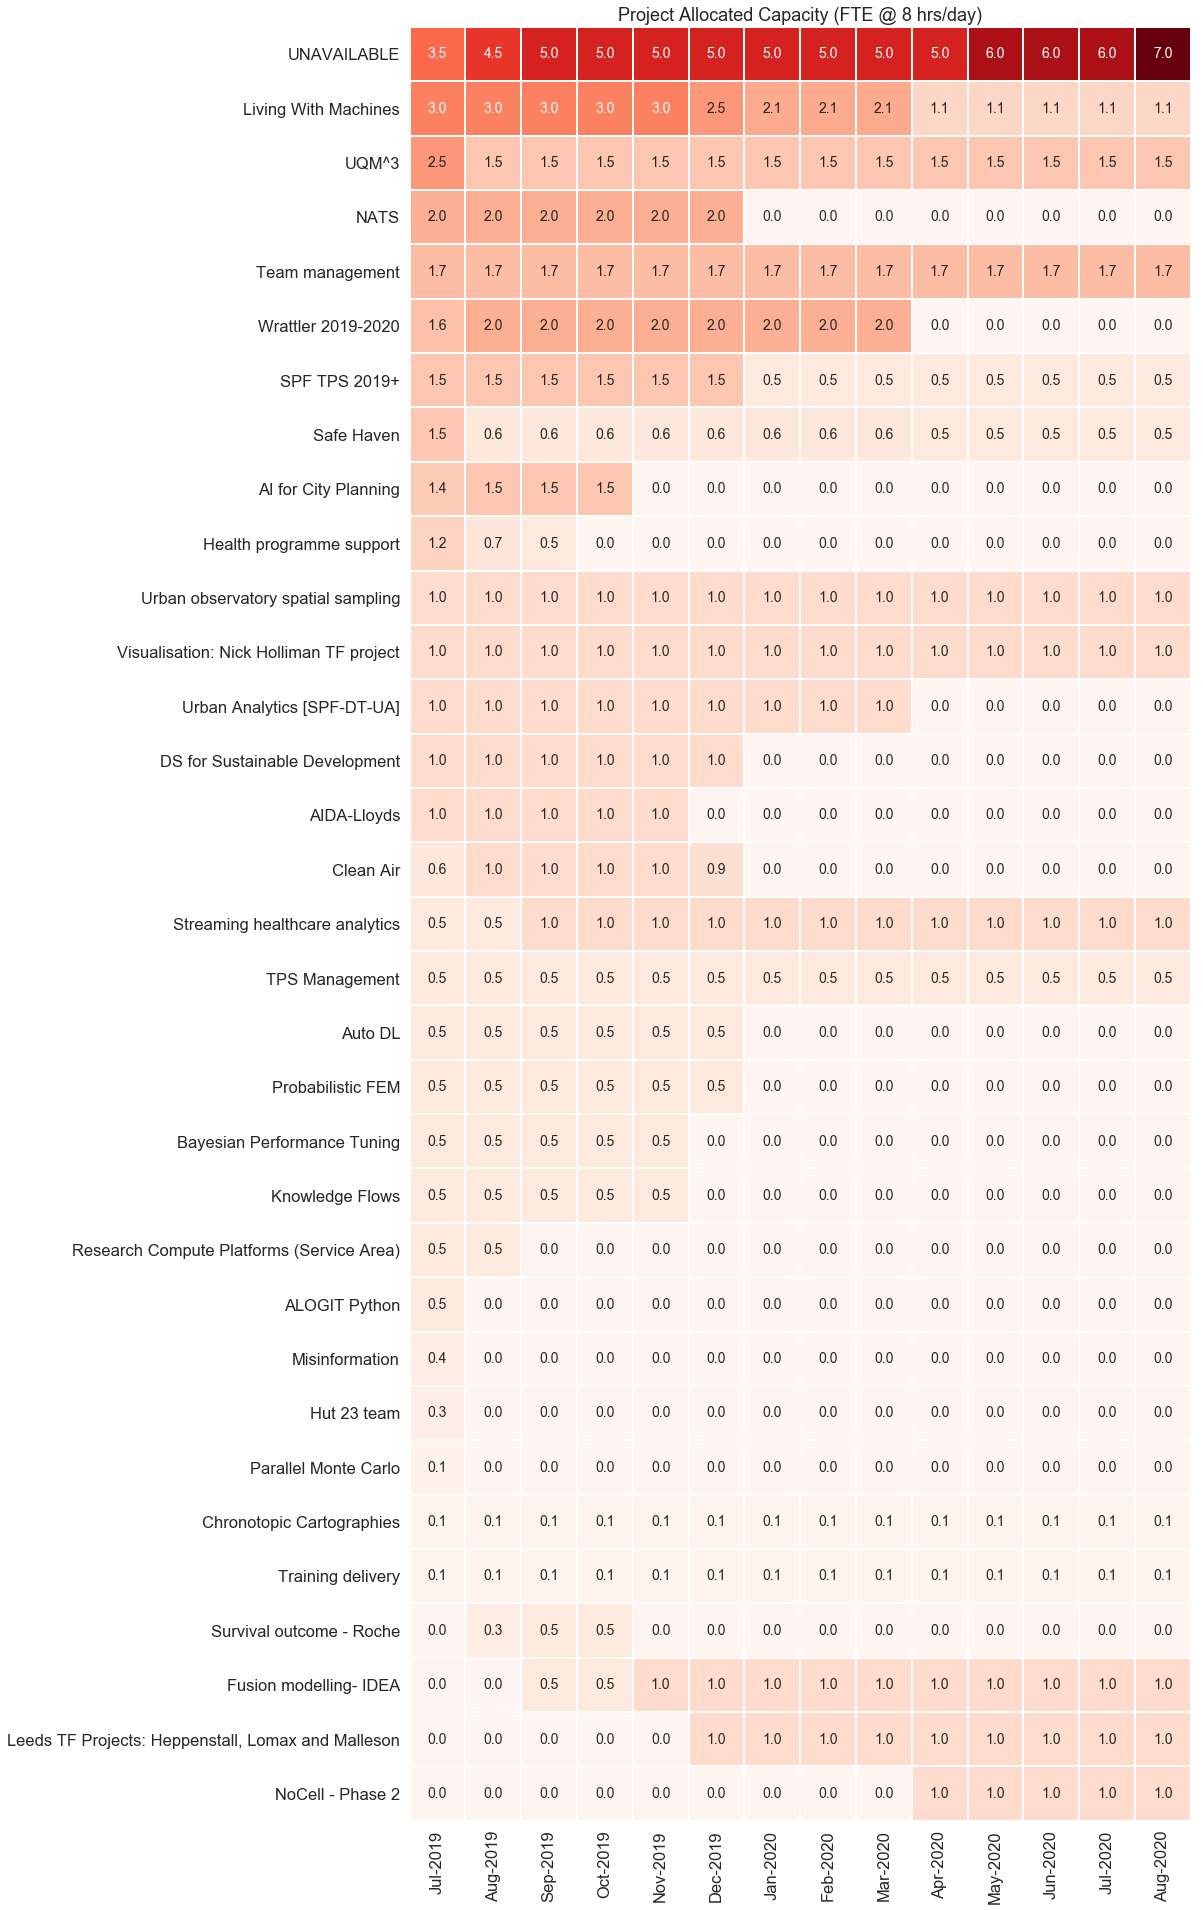

In [11]:
vis.heatmap_allocations('PROJECT_ALLOCATED', 'institute');

## Show the Additional Resources Needed to be Allocated to Each Project

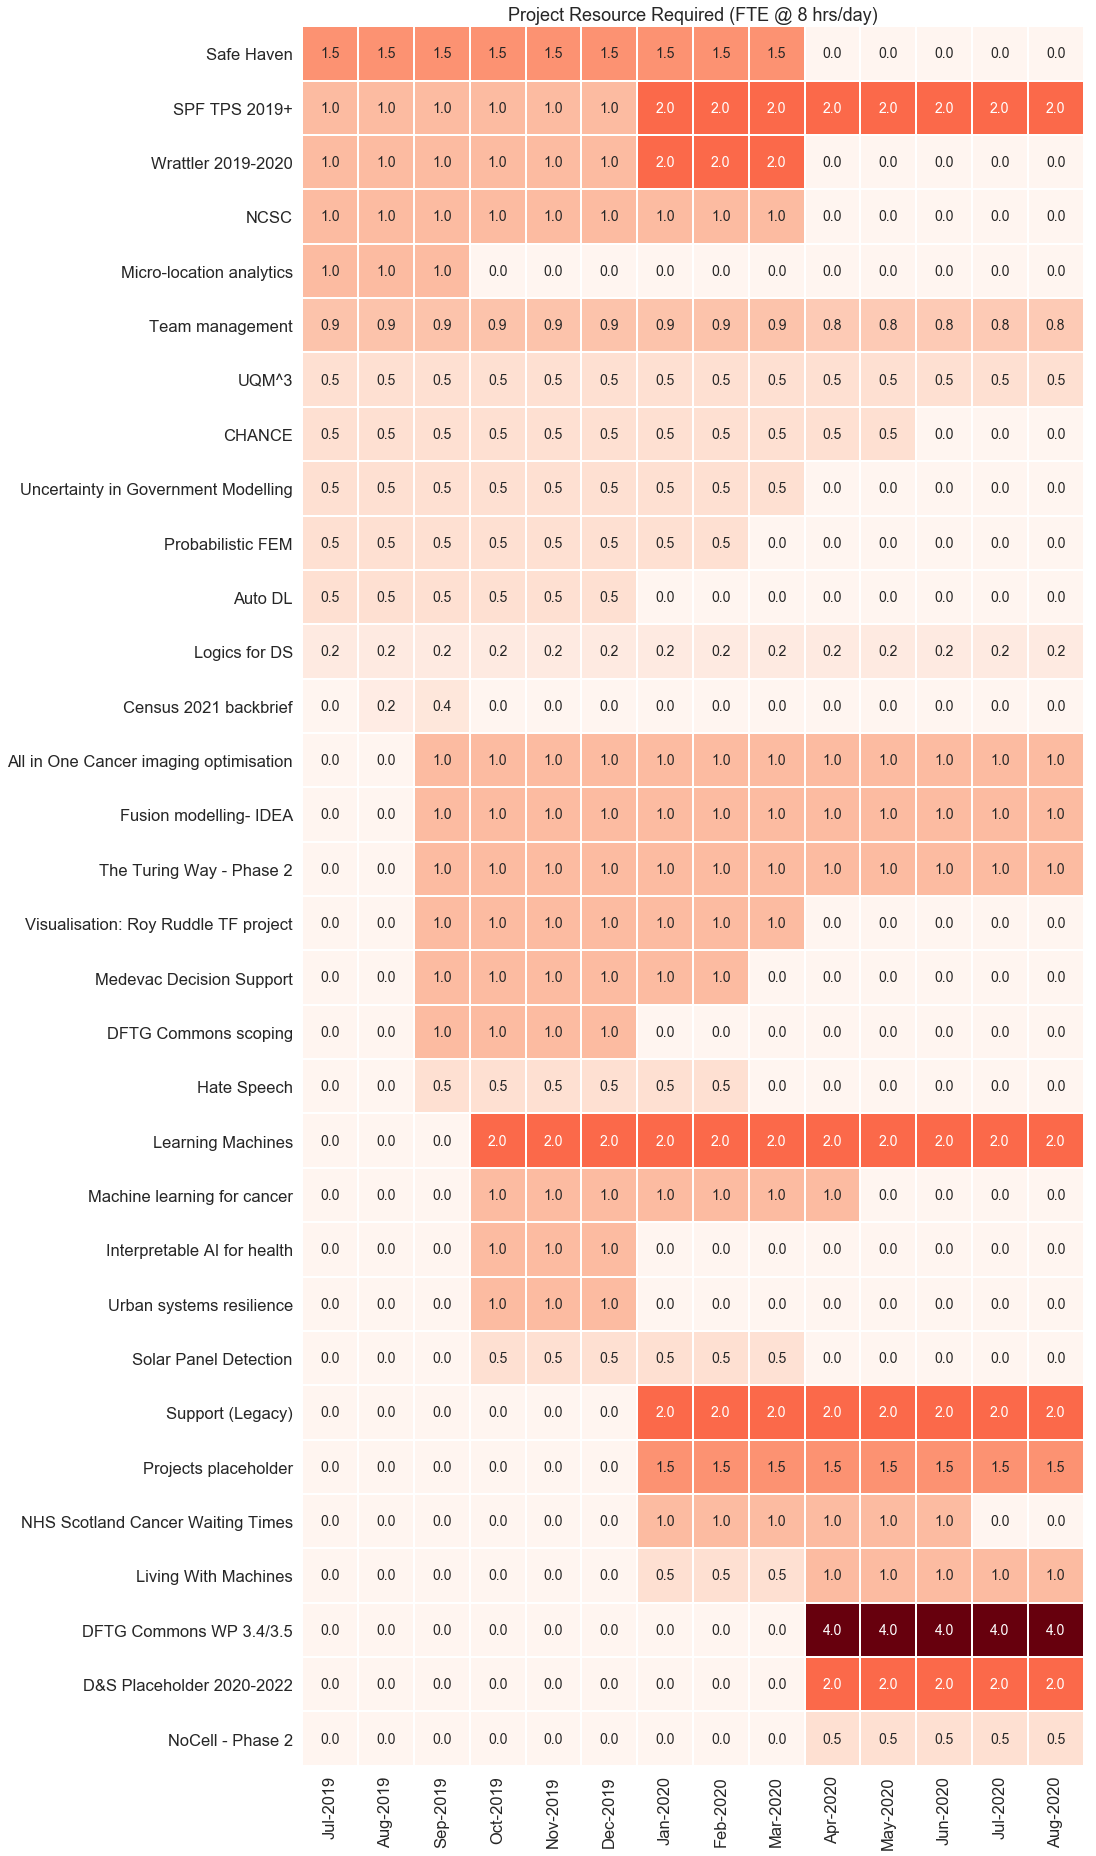

In [12]:
vis.heatmap_allocations('PROJECT_RESREQ', 'institute');

## Show Allocations for a Placeholder

Dropdown(description='Placeholder:', options=('DEFERRED', 'RESOURCE REQUIRED', 'UNCONFIRMED'), value='DEFERRED…

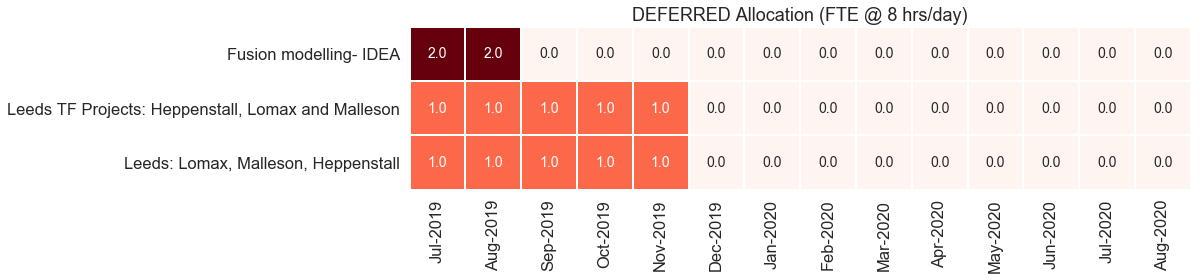

In [20]:
## dropdown list to select a placeholder
widg_place_select = widgets.Dropdown(options=sorted([vis.wim.get_person_name(idx) 
                                                     for idx in vis.wim.people.index
                                                     if vis.wim.people.loc[idx, 'association']==vis.wim.get_association_id('Placeholder')]),
                                 description='Placeholder:')

def widg_select_alloc(change):
    """Function called by widgets to update the allocation plot and table.
    The change argument isn't used but it's required for widget.observe."""
    
    # clear the previous output, then display the widgets again
    clear_output()
    display(widg_place_select)
    
    # get the person_id from the selected full name (need to first split into first and last names)
    placeholder_id = vis.wim.get_person_id(widg_place_select.value)
    
    # plot the person allocations
    vis.plot_allocations(placeholder_id, 'placeholder')
    
    # print the person allocations table
    #display(vis.table_allocations(person_id, 'person'))
    vis.heatmap_allocations(placeholder_id, 'placeholder')
    
# setup the event listeners
widg_place_select.observe(widg_select_alloc, names='value')

# display the widgets
display(widg_place_select)

# show results with initial values
widg_select_alloc(None)